<a href="https://colab.research.google.com/github/Jaswithagadde/internship/blob/main/LinearRegression(_with_noise).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Simple Linear Regression ---
Intercept: 69074.78696643148
Coefficient: 164.88979739856762
MAE: 24425.710685594997
MSE: 832921883.3701845
R² Score: 0.573196277963446


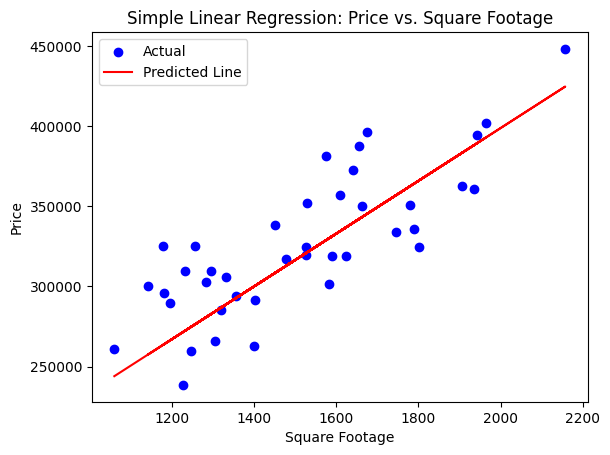


--- Multiple Linear Regression ---
Intercept: 25138.649695917324
Coefficients: [  161.03227348 10205.56441354 10219.14936473]
MAE: 19421.270289874483
MSE: 601994878.0217906
R² Score: 0.6915273092033173


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.random.seed(42)
n_samples = 200

sqft_living = np.random.normal(1500, 300, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
bathrooms = np.random.randint(1, 4, n_samples)

price = 50000 + (sqft_living * 150) + (bedrooms * 10000) + (bathrooms * 5000) + np.random.normal(0, 20000, n_samples)

df = pd.DataFrame({
    'sqft_living': sqft_living,
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'price': price
})

X_simple = df[['sqft_living']]
y = df['price']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

y_pred_s = model_simple.predict(X_test_s)

print("\n--- Simple Linear Regression ---")
print("Intercept:", model_simple.intercept_)
print("Coefficient:", model_simple.coef_[0])
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("R² Score:", r2_score(y_test_s, y_pred_s))

plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Predicted Line')
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Price vs. Square Footage")
plt.legend()
plt.show()

X_multi = df[['sqft_living', 'bedrooms', 'bathrooms']]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

y_pred_m = model_multi.predict(X_test_m)

print("\n--- Multiple Linear Regression ---")
print("Intercept:", model_multi.intercept_)
print("Coefficients:", model_multi.coef_)
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("R² Score:", r2_score(y_test_m, y_pred_m))
